In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import silhouette_score

perplexity = 25
ARI_all = []
NMI_all = []
Sil_all = []
# Define the folder containing the files
folder_path = 'npy_rn152/Embeddings_noTrain/'

# Define the species order
species_order = [
    'watkins', 'bats', 'cbi', 'humbugdb', 'dogs',
    'dcase', 'enabirds', 'hiceas', 'rfcx', 'hainan-gibbons'
]

# List all files in the folder
files = os.listdir(folder_path)

# Filter and sort the feature and label files based on species order
features_files = sorted([f for f in files if 'features.npy' in f], key=lambda x: species_order.index(x.split('_')[0]))
labels_files = sorted([f for f in files if 'labels.npy' in f], key=lambda x: species_order.index(x.split('_')[0]))

# Load the data from the files
for feature_file, label_file in zip(features_files, labels_files):
    # Construct the full path to the files
    feature_path = os.path.join(folder_path, feature_file)
    label_path = os.path.join(folder_path, label_file)
    
    X = np.load(feature_path)
    X_labels = np.load(label_path)
    
    if len(X_labels.shape) > 1: # detection task with one-hot encoder 0-1-0
        # Check for all-zero rows
        all_zeros = np.all(X_labels == 0, axis=1)
        # Use np.argmax for rows that are not all zeros
        # For rows that are all zeros, assign a unique class identifier (e.g., 0)
        num_classes = X_labels.shape[1]  # assign real label 0-1-2 to 1-2-3 by adding 1
        X_labels_transformed = np.where(all_zeros, 0, np.argmax(X_labels, axis=1)+1)
        X_labels = X_labels_transformed
    N_class = len(np.unique(X_labels))
    N_sample = len(X_labels)
#     print('number of classs=',np.unique(N_class))
#     N_class_all.append(N_class)
#     print('N_class_all=',N_class_all)
    n_iter = 5000
    tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=n_iter, 
            init='random', learning_rate='auto', random_state=42, n_jobs=-1)
    tsne_results = tsne.fit_transform(X) # this step tool several seconds

    kmeans = KMeans(n_clusters=N_class, random_state=42) ## parallel automatically
    labels_pred = kmeans.fit_predict(tsne_results)
    labels_true = X_labels
    
    ari_score = adjusted_rand_score(labels_true, labels_pred)
    ARI_all.append(round(ari_score, 3))
#     print(f"Adjusted Rand Index: {round(ari_score, 3)}")
    print('ARI_all=', ARI_all)
    
    nmi_score = normalized_mutual_info_score(labels_true, labels_pred)
    NMI_all.append(round(nmi_score,3))
#     print(f"Normalized Mutual Information: {round(nmi_score,3)}")
    print('NMI_all=', NMI_all)
    
    silhouette_avg = silhouette_score(X, labels_pred, n_jobs = -1)
    Sil_all.append(round(silhouette_avg,3))
#     print('silhouette_avg=',round(silhouette_avg,3))
    print('Sil_all=', Sil_all)

ARI_all= [0.019]
NMI_all= [0.206]
Sil_all= [0.452]
ARI_all= [0.019, 0.024]
NMI_all= [0.206, 0.049]
Sil_all= [0.452, -0.064]
ARI_all= [0.019, 0.024, 0.001]
NMI_all= [0.206, 0.049, 0.304]
Sil_all= [0.452, -0.064, 0.21]
ARI_all= [0.019, 0.024, 0.001, 0.031]
NMI_all= [0.206, 0.049, 0.304, 0.088]
Sil_all= [0.452, -0.064, 0.21, 0.078]
ARI_all= [0.019, 0.024, 0.001, 0.031, 0.022]
NMI_all= [0.206, 0.049, 0.304, 0.088, 0.109]
Sil_all= [0.452, -0.064, 0.21, 0.078, 0.443]
ARI_all= [0.019, 0.024, 0.001, 0.031, 0.022, 0.002]
NMI_all= [0.206, 0.049, 0.304, 0.088, 0.109, 0.038]
Sil_all= [0.452, -0.064, 0.21, 0.078, 0.443, -0.21]
ARI_all= [0.019, 0.024, 0.001, 0.031, 0.022, 0.002, 0.003]
NMI_all= [0.206, 0.049, 0.304, 0.088, 0.109, 0.038, 0.029]
Sil_all= [0.452, -0.064, 0.21, 0.078, 0.443, -0.21, 0.365]
ARI_all= [0.019, 0.024, 0.001, 0.031, 0.022, 0.002, 0.003, 0.011]
NMI_all= [0.206, 0.049, 0.304, 0.088, 0.109, 0.038, 0.029, 0.006]
Sil_all= [0.452, -0.064, 0.21, 0.078, 0.443, -0.21, 0.365, 0.548]
ARI

In [ ]:

full_name = "hiceas_alexnet-pretrained_lr0.0005_epoch29_features"

species = full_name.split("_")[0]
words = full_name.split("_")
selected_words = words[1:-1]
nn_model = "_".join(selected_words)
X=np.load(folder+species+'_'+nn_model+'_features.npy') # total batches and feature dimensions
X_labels = np.load(folder+species+'_'+nn_model+'_labels.npy')

if len(X_labels.shape) > 1: # detection task with one-hot encoder 0-1-0
    # Check for all-zero rows
    all_zeros = np.all(X_labels == 0, axis=1)
    # Use np.argmax for rows that are not all zeros
    # For rows that are all zeros, assign a unique class identifier (e.g., 0)
    num_classes = X_labels.shape[1]  # assign real label 0-1-2 to 1-2-3 by adding 1
    X_labels_transformed = np.where(all_zeros, 0, np.argmax(X_labels, axis=1)+1)
    X_labels = X_labels_transformed
N_class = len(np.unique(X_labels))
N_sample = len(X_labels)

perplexity = 100
n_iter = 5000
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=n_iter, 
            init='random', learning_rate='auto', random_state=42, n_jobs=-1)
tsne_results = tsne.fit_transform(X) # this step tool several seconds

kmeans = KMeans(n_clusters=N_class, random_state=42) ## parallel automatically
labels_pred = kmeans.fit_predict(tsne_results)


ari_score = adjusted_rand_score(labels_true, labels_pred)
print(f"Adjusted Rand Index: {round(ari_score, 3)}")
nmi_score = normalized_mutual_info_score(labels_true, labels_pred)
print(f"Normalized Mutual Information: {round(nmi_score,3)}")
silhouette_avg = silhouette_score(X, labels_pred, n_jobs = -1)
print(round(silhouette_avg,3))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 660 samples in 0.001s...
[t-SNE] Computed neighbors for 660 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 660 / 660
[t-SNE] Mean sigma: 0.090838
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.742565
[t-SNE] KL divergence after 2100 iterations: 0.990204


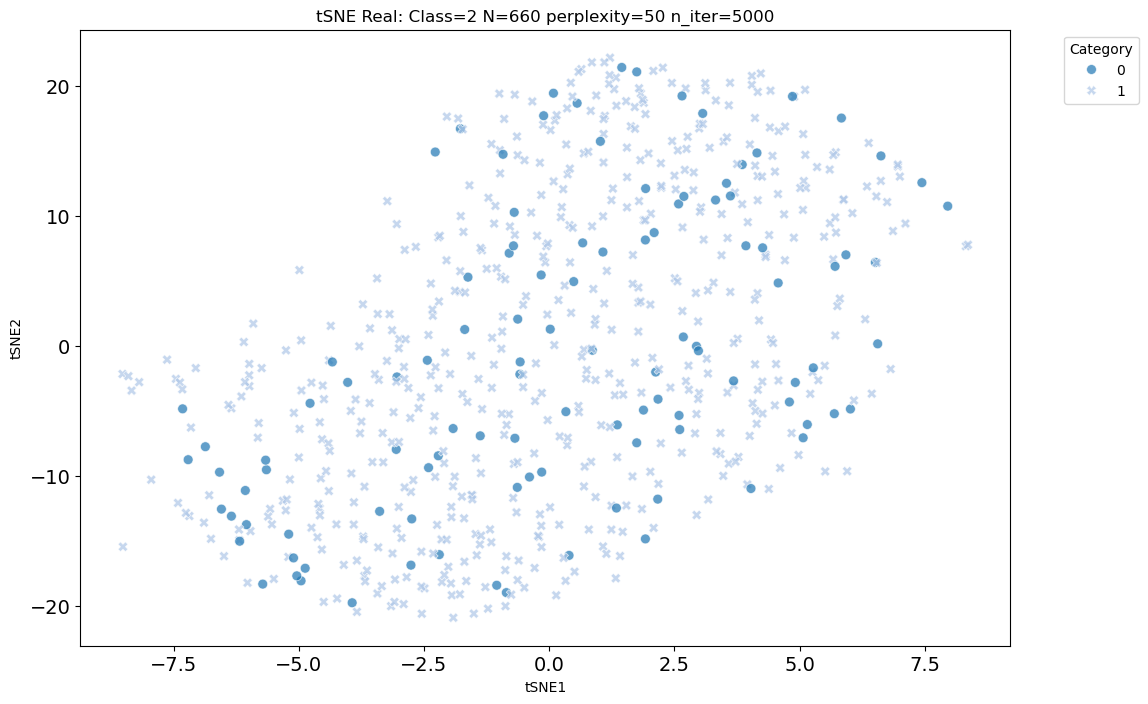

In [248]:



tsne_df = pd.DataFrame(tsne_results, columns=['tSNE1', 'tSNE2'])
tsne_df['Labels'] = pd.DataFrame(X_labels)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', 
                hue='Labels', style='Labels',
                palette='tab20', alpha=0.7, s=50)
    # bbox_to_anchor specifies the legend's position relative to the axes' bounding box 
    # with (1.05, 1) placing it just outside the right top corner of the plot.
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('tSNE Real: Class='+str(N_class)+' N='+str(N_sample)+
          ' perplexity='+str(perplexity)+' n_iter='+str(n_iter))
    # Save the figure with high resolution; MUST ahead of image displaying
plt.savefig(species+'_'+nn_model+'_'+'tSNE'+'_perplexity_'+
            str(perplexity)+'.pdf', dpi=300, bbox_inches='tight') 
### Adjust the font size of the ticks on both axes
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

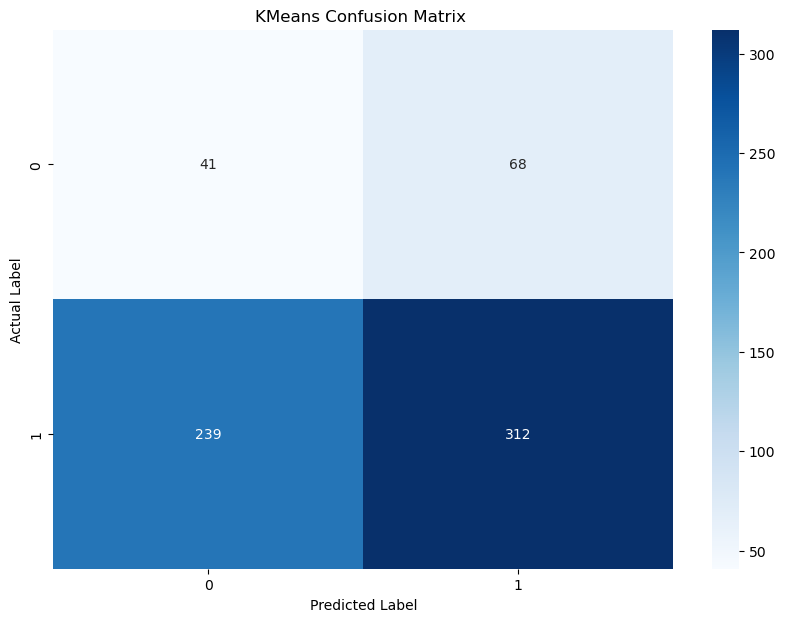

Type 0: 109 elements accuracy=37.61467889908257
Type 1: 551 elements accuracy=56.62431941923774
Mean Accuracy: 47.1±9.5


In [249]:
### we know the groundtruch labels. 
### We want to predict the labels based on UMAP DA results with clustering method
### There are 4 clustering method with pre-designed cluster numbers
### https://scikit-learn.org/stable/modules/clustering.html#clustering
cluster_method = 'KMeans'

if cluster_method == 'HDBSCAN':
    import hdbscan # can't control the number of clusters
    # n_jobs=-1 will cause error! 
    clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
    clusterer.fit(tsne_results)
    labels_pred = clusterer.labels_
elif cluster_method == 'KMeans':
    from sklearn.cluster import KMeans
    # Specify the number of clusters
    # From 0.23 it uses all cores by default. 
    # n_jobs=-1 will cause error!
    kmeans = KMeans(n_clusters=N_class, random_state=42) ## parallel automatically
    labels_pred = kmeans.fit_predict(tsne_results)
elif cluster_method == 'GMM':
    from sklearn.mixture import GaussianMixture
    # assume the data is generated from a mixture of several Gaussian distributions with unknown parameters. 
    # GMM can accommodate clusters that have different sizes and correlation structures.
    # n_jobs=-1 will cause error!
    gmm = GaussianMixture(n_components=N_class, random_state=42)
    labels_pred = gmm.fit_predict(tsne_results)
elif cluster_method == 'SC':
    from sklearn.cluster import SpectralClustering
    # uses the eigenvalues of a similarity matrix of the data to reduce dimensionality before clustering 
    # in fewer dimensions. It can capture complex cluster structures and is particularly good for non-convex clusters.
    # n_jobs=-1 works but with very low speed
    spectral = SpectralClustering(n_clusters=N_class, n_jobs=-1, random_state=42, assign_labels='discretize')
    labels_pred = spectral.fit_predict(tsne_results)
elif cluster_method == 'HAC':
    from sklearn.cluster import AgglomerativeClustering
    # best for watkins dataset
    # metricstr or callable, default=”euclidean”:::“euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”
    # linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
    # for watkin dataset, 'ward'~='average'>‘complete’>‘single’
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
    # builds a hierarchy of clusters using a bottom-up approach, starting with individual data points 
    # as their own cluster and merging the closest pairs at each step. 
    # n_jobs=-1 will cause error!
    agglomerative = AgglomerativeClustering(n_clusters=N_class, linkage='ward')
    labels_pred = agglomerative.fit_predict(tsne_results)

### match the sequence of predicted labels to real labels
labels_true = X_labels
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_true, labels_pred)
# The linear_sum_assignment function minimizes the cost, so to maximize the number of correct assignments,
# we need to negate the confusion matrix since higher numbers indicate better matches.
# The Hungarian algorithm finds the optimal assignment for the negated matrix.
row_ind, col_ind = linear_sum_assignment(-cm)
# Create a new array to hold the remapped predicted labels
remapped_labels_pred = np.zeros_like(labels_pred)
# Remap the predicted labels to match the true labels as closely as possible
for pred, true in zip(col_ind, row_ind):
    remapped_labels_pred[labels_pred == pred] = true
# Now, 'remapped_labels_pred' should correspond more closely to 'labels_true' in terms of label identifiers.

### plot the results
cm = confusion_matrix(labels_true, remapped_labels_pred)
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(cluster_method+" Confusion Matrix ")
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.savefig(species+'_'+nn_model+'_'+'tSNE'+'_perplexity_'+
            str(perplexity)+'_'+str(cluster_method)+'cluster_CM.pdf', dpi=300, bbox_inches='tight') 
    plt.show()

class_names = np.arange(N_class)  # Example: np.array(["Class 1", "Class 2", ..., "Class 31"])
plot_confusion_matrix(cm, class_names)

# Calculate the accuracy for each class
class_accuracies = cm.diagonal() / cm.sum(axis=1)
class_accuracies = (class_accuracies*100)
from collections import Counter
# Assuming labels_true is your array or list of true labels
labels_count = Counter(labels_true)
# Iterating from 0 to N_class-1 and printing the number of elements for each type
for label in range(N_class):  # N_class is exclusive, so it prints 0 to N_class-1
    print(f"Type {label}: {labels_count[label]} elements accuracy="+str(class_accuracies[label]))

# Calculate the mean of the accuracies
mean_accuracy = np.nanmean(class_accuracies) #mainly for enabirds dataset
# Calculate the standard deviation of the accuracies
std_deviation = np.nanstd(class_accuracies)
# Print out the mean and standard deviation in the format mean +/- standard deviation
print(f"Mean Accuracy: {mean_accuracy:.1f}±{std_deviation:.1f}")

In [250]:
print(f"Mean Accuracy: {mean_accuracy:.1f}±{std_deviation:.1f}")
### only two inputs: labels_true, labels_pred
### No need for this (nothing change execpt Hopkins)labels_pred = remapped_labels_pred
from sklearn.metrics import adjusted_rand_score
### An ARI score of 1 indicates perfect labeling
ari_score = adjusted_rand_score(labels_true, labels_pred)
# print(f"Adjusted Rand Index: {round(ari_score, 3)}")
print(f"Adjusted Rand Index: {round(ari_score, 3)}")
from sklearn.metrics import normalized_mutual_info_score
### similarity between true and predicted labels, 0 (no mutual information) and 1 (perfect correlation).
nmi_score = normalized_mutual_info_score(labels_true, labels_pred)
print(f"Normalized Mutual Information: {round(nmi_score,3)}")
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
### Homogeneity: each cluster contains only members of a single class.
### Completeness: all members of a given class are assigned to the same cluster.
### V-Measure: the harmonic mean between homogeneity and completeness.
homogeneity = homogeneity_score(labels_true, labels_pred)
completeness = completeness_score(labels_true, labels_pred)
v_measure = v_measure_score(labels_true, labels_pred)
# print(f"Homogeneity: {homogeneity}")
# print(f"Completeness: {completeness}")
# print(f"V-Measure: {v_measure}")
from sklearn.metrics import silhouette_score
### Measures how similar an object is to its own cluster compared to other clusters.
### Ranges from -1 to 1, high value indicates object is well matched to its own cluster
### Unlike the other metrics, the Silhouette Score does not require true labels

### Ask Gemini and ChatGPT for parallel but failed or too complex
silhouette_avg = silhouette_score(X, labels_pred, n_jobs = -1)
# print(f"Silhouette Score: {round(silhouette_avg,3)}")
print(round(silhouette_avg,3))

### It measures the probability that a given dataset is generated by a uniform data distribution.
### A value close to 1 suggests the data is uniformly distributed (random)
### from sklearn.neighbors import NearestNeighbors
# def hopkins_statistic(X):
#     n, d = X.shape
#     m = int(0.1 * n)  # m points for comparison, 10% of the dataset size is a common choice
#     nbrs = NearestNeighbors(n_neighbors=1).fit(X)
#     # Generate random points for the synthetic dataset
#     random_points = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), (m, d))
#     # Calculate distances of real points to their nearest neighbors
#     _, dist_real = nbrs.kneighbors(X[np.random.choice(n, m, replace=False), :])
#     # Calculate distances of random points to nearest real points
#     _, dist_random = nbrs.kneighbors(random_points)
#     H = np.sum(dist_random) / (np.sum(dist_real) + np.sum(dist_random))
#     return H
# print(f"Hopkins Statistic: {hopkins_statistic(X)}")

Mean Accuracy: 47.1±9.5
Adjusted Rand Index: -0.006
Normalized Mutual Information: 0.002
0.25
